In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.utils as vutils
import numpy as np
from collections import defaultdict
import time
import random
from torchvision.transforms.functional import crop
from torchvision.transforms import Resize, ToPILImage
# from utils import (get_image_tensor,get_target_id)
#from cnn import (get_image_tensor,get_target_id)
# from model import weights_init
# from model import Generator, NLayerDiscriminator, DHead, QHead,unet256
# from model import noise_sample
tensor_to_numpy = lambda t:t.detach().cpu().numpy()
TODO = None
#=========================================================
import os
import cv2
from utils import get_image_tensor, get_patches
from cnn import *
from PIL import Image
import skimage.io
import shutil

ref : min : -1.0, max : 1.0
ref 0-1: min : 0.0, max : 1.0
ref_vgg : min : -2.1179039478302, max : 2.640000104904175
1
2
2
2
2
Generator(
  (tconv1): Sequential(
    (0): LambdaLayer()
    (1): Conv2d(130, 448, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(448, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv2): Sequential(
    (0): LambdaLayer()
    (1): Conv2d(448, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  )
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv3): Sequential(
    (0): LambdaLayer()
    (1): Conv2d(256, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  )
  (tconv4): Sequential(
    (0): LambdaLayer()
    (1): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  )
  (tconv5): Sequential(
    (0): LambdaLayer()
    (1): Conv2d(64, 3, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bia

  0%|          | 0/1000 [00:00<?, ?it/s]

modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
0/1000, gen_loss : 0.1451, G_loss : 0.1451, D_loss : 3.3623, loss_d_real : 0.8122, loss_d_fake : 2.4516


<IPython.core.display.Javascript object>


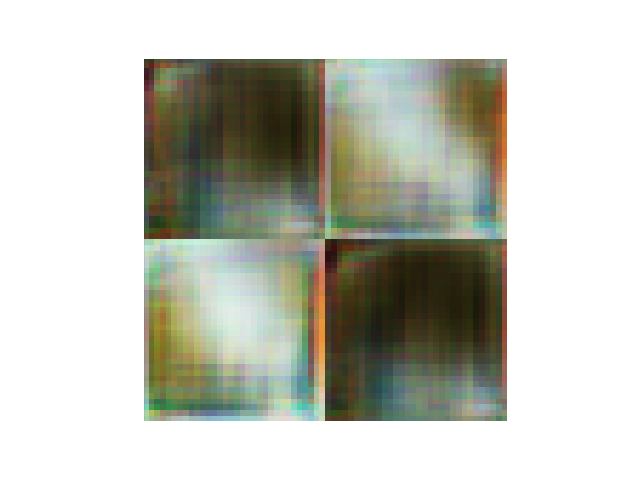

<IPython.core.display.Javascript object>


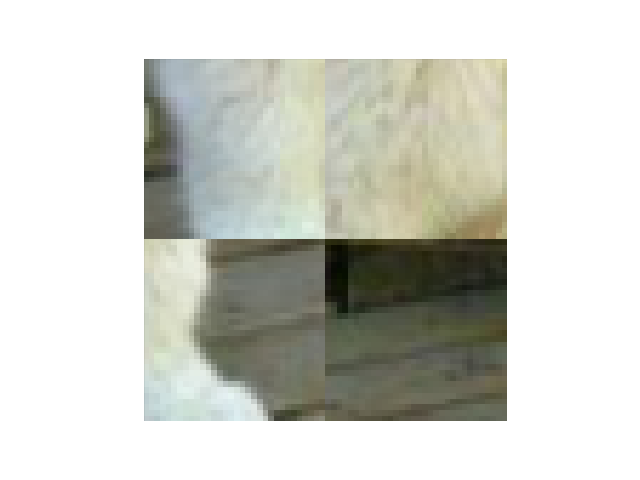

<IPython.core.display.Javascript object>


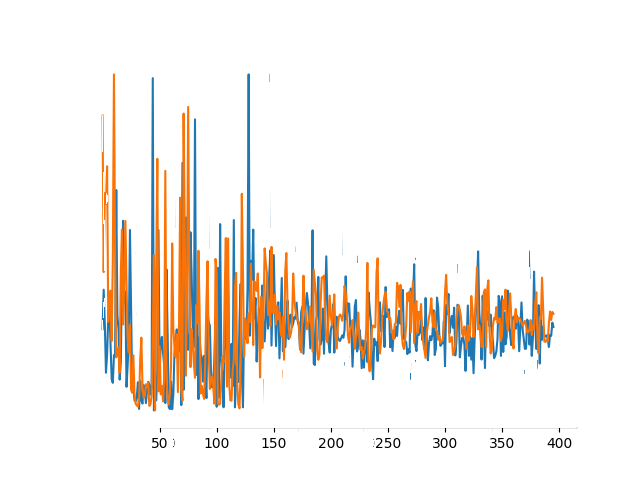

modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
1/1000, gen_loss : 1.1764, G_loss : 1.1764, D_loss : 2.4696, loss_d_real : 1.1813, loss_d_fake : 1.1917
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
2/1000, gen_loss : 0.7639, G_loss : 0.7639, D_loss : 2.7815, loss_d_real : 0.8586, loss_d_fake : 1.8258
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
3/1000, gen_loss : 0.4722, G_loss : 0.4722, D_loss : 2.2410, loss_d_real : 0.4028, loss_d_fake : 1.7402
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
4/1000, gen_loss : 0.3441, G_loss : 0.3441, D_loss : 2.7168, loss_d_real : 0.5769, loss_d_fake : 2.0424
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, n

modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
38/1000, gen_loss : 2.3395, G_loss : 2.3395, D_loss : 0.5058, loss_d_real : 0.1176, loss_d_fake : 0.2895
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
39/1000, gen_loss : 2.8565, G_loss : 2.8565, D_loss : 0.6020, loss_d_real : 0.2400, loss_d_fake : 0.2643
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
40/1000, gen_loss : 2.7626, G_loss : 2.7626, D_loss : 0.7152, loss_d_real : 0.3174, loss_d_fake : 0.3009
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
41/1000, gen_loss : 2.4452, G_loss : 2.4452, D_loss : 0.5013, loss_d_real : 0.2896, loss_d_fake : 0.1152
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sampl

modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
75/1000, gen_loss : 0.3597, G_loss : 0.3597, D_loss : 3.2360, loss_d_real : 0.6176, loss_d_fake : 2.5195
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
76/1000, gen_loss : 0.8189, G_loss : 0.8189, D_loss : 2.1138, loss_d_real : 0.7802, loss_d_fake : 1.2362
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
77/1000, gen_loss : 2.3804, G_loss : 2.3804, D_loss : 2.2441, loss_d_real : 1.7208, loss_d_fake : 0.4267
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
78/1000, gen_loss : 1.1778, G_loss : 1.1778, D_loss : 2.1691, loss_d_real : 1.3396, loss_d_fake : 0.7325
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sampl

modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
112/1000, gen_loss : 2.3379, G_loss : 2.3379, D_loss : 0.6150, loss_d_real : 0.3592, loss_d_fake : 0.1583
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
113/1000, gen_loss : 2.2254, G_loss : 2.2254, D_loss : 0.9285, loss_d_real : 0.6742, loss_d_fake : 0.1569
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
114/1000, gen_loss : 1.6101, G_loss : 1.6101, D_loss : 0.7798, loss_d_real : 0.2771, loss_d_fake : 0.4039
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
115/1000, gen_loss : 1.5774, G_loss : 1.5774, D_loss : 2.4239, loss_d_real : 1.8344, loss_d_fake : 0.4924
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_s

modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
149/1000, gen_loss : 0.7011, G_loss : 0.7011, D_loss : 2.0630, loss_d_real : 1.0945, loss_d_fake : 0.8697
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
150/1000, gen_loss : 0.6506, G_loss : 0.6506, D_loss : 2.4703, loss_d_real : 1.5062, loss_d_fake : 0.8661
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
151/1000, gen_loss : 0.5345, G_loss : 0.5345, D_loss : 2.1188, loss_d_real : 1.0093, loss_d_fake : 1.0114
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
152/1000, gen_loss : 0.6296, G_loss : 0.6296, D_loss : 1.5203, loss_d_real : 0.6524, loss_d_fake : 0.7692
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_s

modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
186/1000, gen_loss : 0.3831, G_loss : 0.3831, D_loss : 1.6829, loss_d_real : 0.4752, loss_d_fake : 1.1088
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
187/1000, gen_loss : 0.6113, G_loss : 0.6113, D_loss : 1.9949, loss_d_real : 0.8936, loss_d_fake : 1.0023
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
188/1000, gen_loss : 0.9519, G_loss : 0.9519, D_loss : 1.6114, loss_d_real : 0.9470, loss_d_fake : 0.5655
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
189/1000, gen_loss : 1.1934, G_loss : 1.1934, D_loss : 1.8859, loss_d_real : 1.3012, loss_d_fake : 0.4858
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_s

modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
223/1000, gen_loss : 0.7557, G_loss : 0.7557, D_loss : 1.4329, loss_d_real : 0.6021, loss_d_fake : 0.7317
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
224/1000, gen_loss : 0.7040, G_loss : 0.7040, D_loss : 1.6243, loss_d_real : 0.6600, loss_d_fake : 0.8654
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
225/1000, gen_loss : 0.8620, G_loss : 0.8620, D_loss : 1.5634, loss_d_real : 0.8071, loss_d_fake : 0.6573
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
226/1000, gen_loss : 0.9375, G_loss : 0.9375, D_loss : 1.3853, loss_d_real : 0.7212, loss_d_fake : 0.5655
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_s

modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
260/1000, gen_loss : 0.6852, G_loss : 0.6852, D_loss : 1.9951, loss_d_real : 0.9845, loss_d_fake : 0.9120
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
261/1000, gen_loss : 0.5386, G_loss : 0.5386, D_loss : 2.0480, loss_d_real : 0.8613, loss_d_fake : 1.0878
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
262/1000, gen_loss : 0.7910, G_loss : 0.7910, D_loss : 1.8810, loss_d_real : 1.0808, loss_d_fake : 0.7012
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
263/1000, gen_loss : 1.0244, G_loss : 1.0244, D_loss : 1.8856, loss_d_real : 1.1804, loss_d_fake : 0.6062
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_s

modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
297/1000, gen_loss : 0.7568, G_loss : 0.7568, D_loss : 1.4130, loss_d_real : 0.6748, loss_d_fake : 0.6391
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
298/1000, gen_loss : 0.7694, G_loss : 0.7694, D_loss : 1.4174, loss_d_real : 0.6783, loss_d_fake : 0.6402
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
299/1000, gen_loss : 0.8569, G_loss : 0.8569, D_loss : 1.7404, loss_d_real : 0.8874, loss_d_fake : 0.7539
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
300/1000, gen_loss : 0.6245, G_loss : 0.6245, D_loss : 1.5912, loss_d_real : 0.4642, loss_d_fake : 1.0282
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_s

modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
334/1000, gen_loss : 0.6454, G_loss : 0.6454, D_loss : 1.9943, loss_d_real : 0.8691, loss_d_fake : 1.0263
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
335/1000, gen_loss : 0.6047, G_loss : 0.6047, D_loss : 1.5970, loss_d_real : 0.4464, loss_d_fake : 1.0518
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
336/1000, gen_loss : 1.0492, G_loss : 1.0492, D_loss : 1.6336, loss_d_real : 0.9487, loss_d_fake : 0.5861
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
337/1000, gen_loss : 0.9110, G_loss : 0.9110, D_loss : 2.0527, loss_d_real : 0.9003, loss_d_fake : 1.0533
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_s

modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
371/1000, gen_loss : 0.7028, G_loss : 0.7028, D_loss : 1.4874, loss_d_real : 0.6290, loss_d_fake : 0.7592
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
372/1000, gen_loss : 0.8014, G_loss : 0.8014, D_loss : 1.7070, loss_d_real : 0.9011, loss_d_fake : 0.7069
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
373/1000, gen_loss : 0.7063, G_loss : 0.7063, D_loss : 1.6823, loss_d_real : 0.8761, loss_d_fake : 0.7072
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
374/1000, gen_loss : 0.7479, G_loss : 0.7479, D_loss : 1.5003, loss_d_real : 0.6665, loss_d_fake : 0.7345
modified noise_sample, not using disc_c
modified noise_sample, not using disc_c
modified noise_s

In [ ]:
%matplotlib notebook
# count = 0
# mask_dir = '../output_dir/maskQ'
# if os.path.exists(mask_dir):
#   shutil.rmtree(mask_dir)
# os.makedirs(mask_dir)
# gen_output_dir = '../output_dir/outputG'
# if os.path.exists(gen_output_dir):
#   shutil.rmtree(gen_output_dir)
# os.makedirs(gen_output_dir)

from gan_saliency import gan_saliency
# if __name__ == '__main__':  
#TODO parameter loading
import parameters.parameters_like_celeba as P
import torch
torch.autograd.set_detect_anomaly(True)
if 'setup':
    if 'seed':
        # Set random seed for reproducibility.
        random.seed(P.seed)
        torch.manual_seed(P.seed)
        #print("Random Seed: ", P.seed)
        trends = defaultdict(list)

    if 'cnn':
        from cnn import init_cnn
        cnn_model = torchvision.models.vgg19(pretrained=True).to(P.device)
        cnn_features = init_cnn(cnn_model,[])
        ref = get_image_tensor(P.impath).to(P.device)
        target_id = get_target_id(P.class_name)  
        #TODO: where should convert_g_to_vgg be placed?
        ref_vgg = convert_g_to_vgg(ref)              


#gan_saliency(
#    ref,ref_vgg,cnn_model,target_id,
#    P.num_epochs,P.patch_size,P.b_size,TODO)

model_options = {
  'model_type': P.model_type,
  'num_z': P.num_z,
  'num_dis_c': P.num_dis_c,
  'dis_c_dim': P.dis_c_dim,
  'DHead_sigmoid': P.DHead_sigmoid
}

gan_saliency(ref, ref_vgg, P.num_epochs,P.patch_size,P.b_size,model_options,cnn_model,
    P.data_mode,target_id,
    P.evaluate_every,
    P.visualize_every,
    P.device,
    trends=trends)


In [ ]:
%debug
# model_options